# Santa Monica Airport Weather Data EDA


I am originally from Long Beach, California, and the recent fires near my hometown have inspired me to explore potential trends in wind, precipitation, and temperature that might contribute to the conditions fueling these fires. For this analysis, I used data from the Santa Monica Airport weather station, which is close to the Pacific Palisades, one of the areas most affected by the fires. This station was chosen for its proximity and high-quality data, which includes daily wind speed, precipitation, minimum temperature, and maximum temperature measurements. The dataset spans two decades, from January 13, 2005, to January 13, 2025, and consists of 7,248 data points after cleaning. Overall, the aim of this data analysis to determine if there are weather conditions conducive to forest fires.

### Import Libraries and Data

In [27]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [28]:
# Load the CSV file from GitHub
file_path = "https://raw.githubusercontent.com/ed3894/GEOL-558A/main/unsupervised/Weather_Data_Santa_Monica.csv"
data = pd.read_csv(file_path)

# Print the column names
print("Column Names:")
print(data.columns)

# Print the first few rows
print("\nFirst Few Values:")
print(data.head())

Column Names:
Index(['STATION', 'NAME', 'DATE', 'AWND', 'PRCP', 'TMAX', 'TMIN'], dtype='object')

First Few Values:
       STATION                                   NAME       DATE  AWND  PRCP  \
0  USW00093197  SANTA MONICA MUNICIPAL AIRPORT, CA US  1/13/2005  4.03   0.0   
1  USW00093197  SANTA MONICA MUNICIPAL AIRPORT, CA US  1/14/2005  3.58   0.0   
2  USW00093197  SANTA MONICA MUNICIPAL AIRPORT, CA US  1/15/2005  3.58   0.0   
3  USW00093197  SANTA MONICA MUNICIPAL AIRPORT, CA US  1/16/2005  4.47   0.0   
4  USW00093197  SANTA MONICA MUNICIPAL AIRPORT, CA US  1/17/2005  6.04   0.0   

   TMAX  TMIN  
0  64.0  42.0  
1  70.0  46.0  
2  71.0  46.0  
3  81.0  51.0  
4  81.0  55.0  


### Clean Data

In [29]:
# Drop rows where any of the specified columns have NaN values
columns_to_check = ['AWND', 'PRCP', 'TMAX', 'TMIN']
data_cleaned = data.dropna(subset=columns_to_check)

# Print the shape of the cleaned dataframe and a preview
print("Shape after removing rows with NaN values in AWND, PRCP, TMAX, or TMIN:")
print(data_cleaned.shape)

print("\nPreview of the cleaned dataframe:")
print(data_cleaned.head())

Shape after removing rows with NaN values in AWND, PRCP, TMAX, or TMIN:
(7248, 7)

Preview of the cleaned dataframe:
       STATION                                   NAME       DATE  AWND  PRCP  \
0  USW00093197  SANTA MONICA MUNICIPAL AIRPORT, CA US  1/13/2005  4.03   0.0   
1  USW00093197  SANTA MONICA MUNICIPAL AIRPORT, CA US  1/14/2005  3.58   0.0   
2  USW00093197  SANTA MONICA MUNICIPAL AIRPORT, CA US  1/15/2005  3.58   0.0   
3  USW00093197  SANTA MONICA MUNICIPAL AIRPORT, CA US  1/16/2005  4.47   0.0   
4  USW00093197  SANTA MONICA MUNICIPAL AIRPORT, CA US  1/17/2005  6.04   0.0   

   TMAX  TMIN  
0  64.0  42.0  
1  70.0  46.0  
2  71.0  46.0  
3  81.0  51.0  
4  81.0  55.0  


### Exploratory Data Analysis

In [30]:
# Check the shape of the dataset
print("Dataset Shape:")
print(data_cleaned.shape)

# Display descriptive statistics
print("\nDescriptive Statistics:")
print(data_cleaned.describe())

Dataset Shape:
(7248, 7)

Descriptive Statistics:
              AWND         PRCP         TMAX         TMIN
count  7248.000000  7248.000000  7248.000000  7248.000000
mean      4.506231     0.033088    70.846164    55.834851
std       1.317005     0.190217     7.483144     6.956778
min       0.000000     0.000000    50.000000    32.000000
25%       3.800000     0.000000    65.000000    51.000000
50%       4.470000     0.000000    70.000000    56.000000
75%       5.140000     0.000000    75.000000    61.000000
max      14.760000     3.460000   103.000000    75.000000


**While there are 7,248 rows, with 4 columns of data to be analyzed, these are single numeric values in each cell. This gives really fast runtimes for visualiziaitons/calculations and would definitely not be considered 'big data'**


Generating Seaborn Pair Plot...


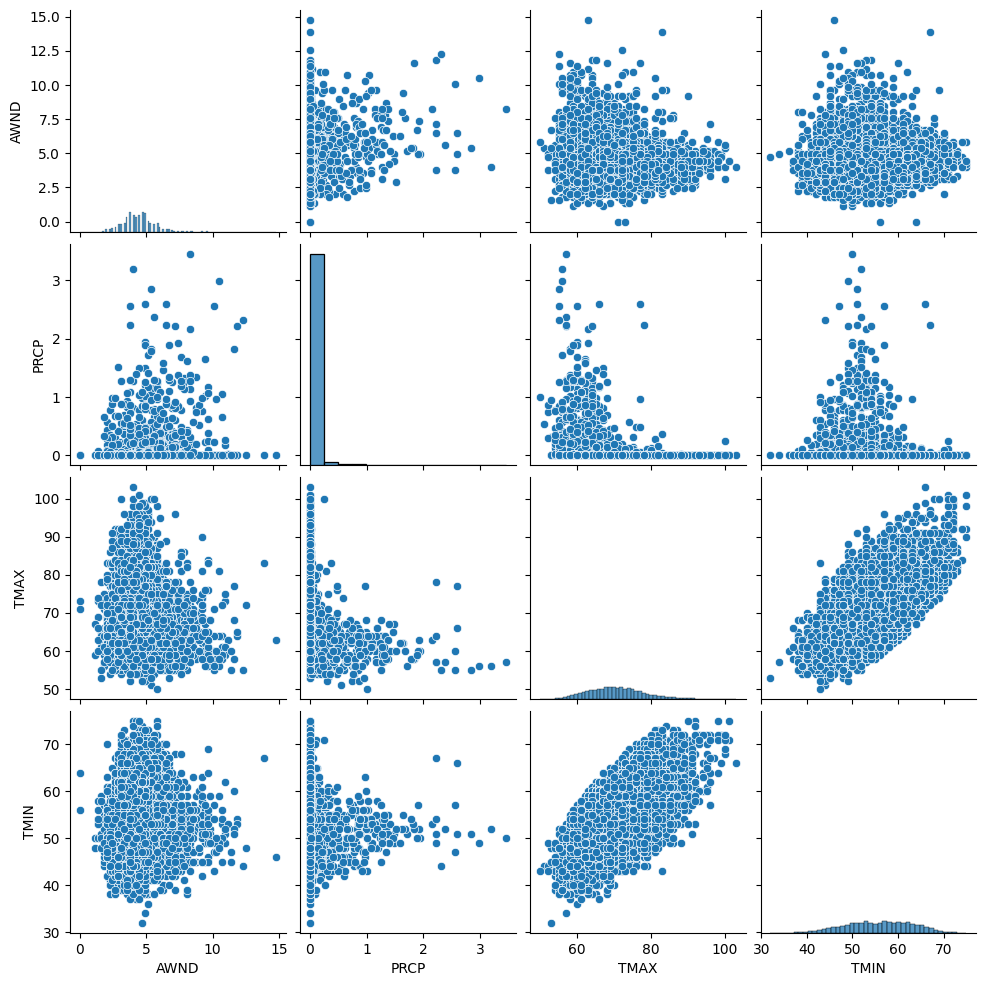

In [31]:
# Pair plot to visualize pairwise relationships
print("\nGenerating Seaborn Pair Plot...")
sns.pairplot(data_cleaned)
plt.show()

**Clearly there will be a distinct trend between temperature minimum and maximum. However, these seaborn plots do show interesting clusters of data. Wind speed and temperature seem to form distinct clusters without many outliers. In comparison, many of the other plots seem to have values scattered out. Precipitation seems to have a lot of values around 0, which explains why many of those points are around that value.**

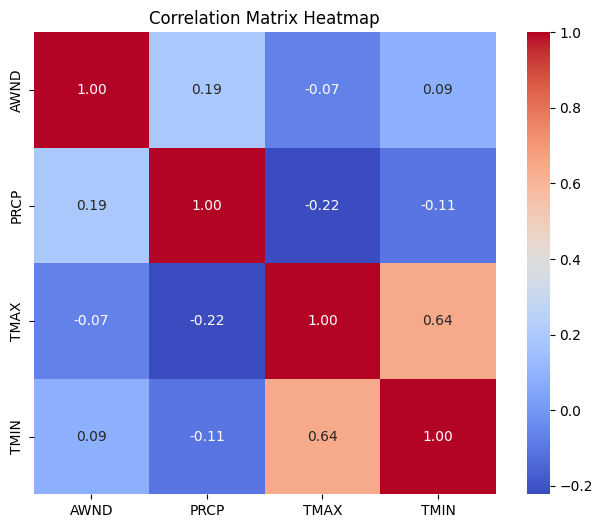

In [32]:
# Select only numeric columns
numeric_data = data_cleaned.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

**The correlation matrix heatmap corroborates many of my previous points from the seaborn plots. The strongest correlation is between temperature min and max. The second strongest correlation is between temperature max and precipitation, which is negative. However, most of these trends are quite weak.**

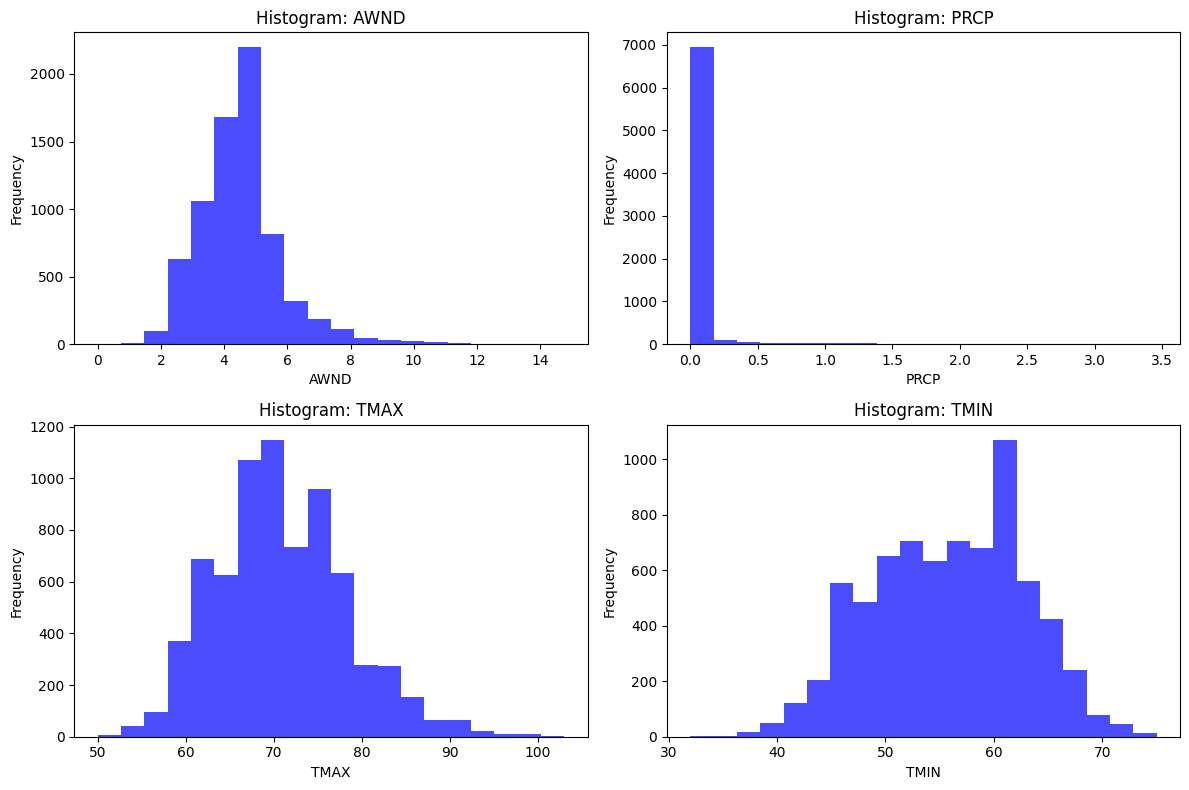

In [33]:
# Create histograms for each column
plt.figure(figsize=(12, 8))
for i, column in enumerate(columns, 1):
    plt.subplot(2, 2, i)  # 2x2 grid for subplots
    plt.hist(data_cleaned[column], bins=20, color='blue', alpha=0.7)
    plt.title(f"Histogram: {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


**The histograms for wind, temp min, and temp max have more normal distributions. With precipitation, we see that the vast majority of values are 0, or near 0 which is indicative of the decades long drought in California, and is a clear connection to increased fire risk.**

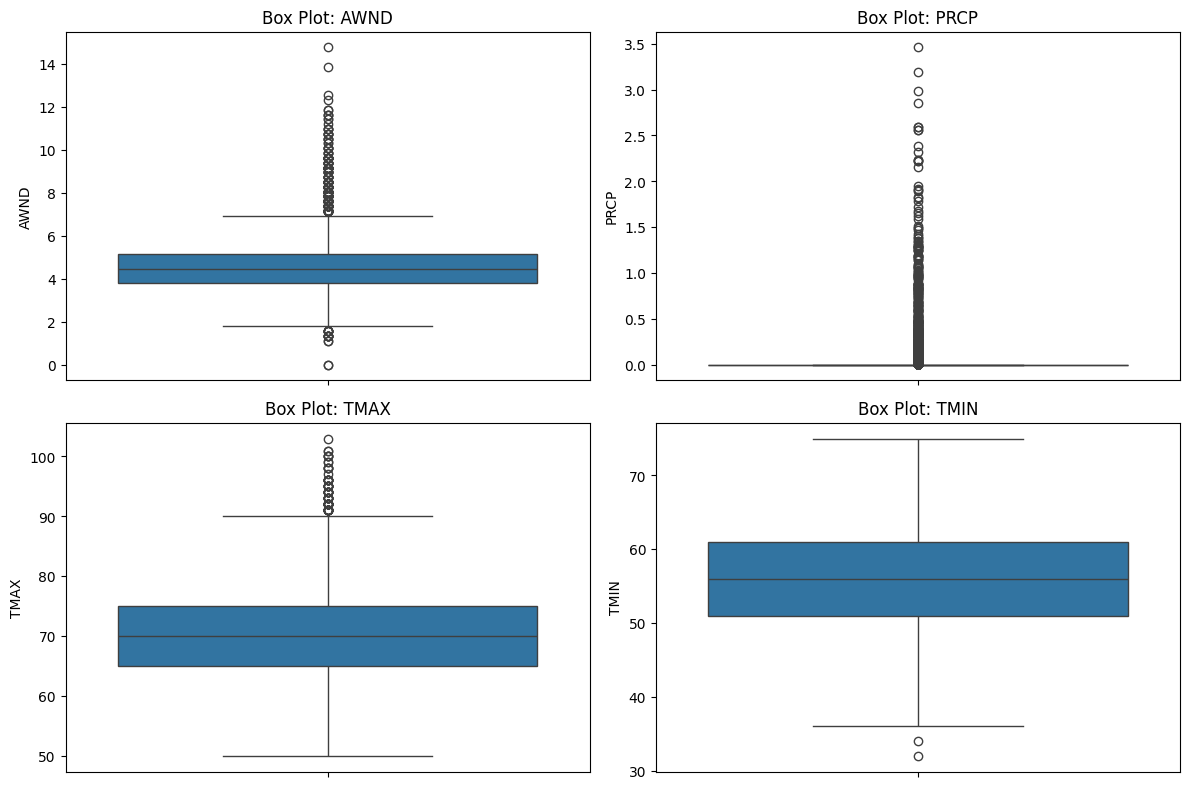

In [34]:
# List of columns to plot
columns = ['AWND', 'PRCP', 'TMAX', 'TMIN']

# Create box plots for each column
plt.figure(figsize=(12, 8))
for i, column in enumerate(columns, 1):
    plt.subplot(2, 2, i)  # 2x2 grid for subplots
    sns.boxplot(y=data_cleaned[column])
    plt.title(f"Box Plot: {column}")
    plt.ylabel(column)

plt.tight_layout()
plt.show()

**The box plots show a lot of similar trends to those mentioned before where wind and temperature data follow more normal distributions, while the precipitation data is condensed to 0.**